In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from func2graph import data, models, tools

torch.Size([10, 30000])


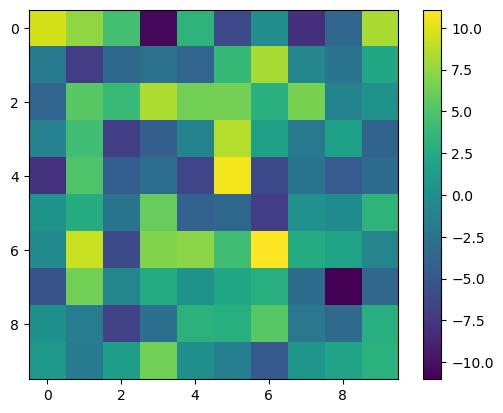

In [3]:
neuron_num = 10
dt = 0.001
tau = 0.3

spike_neuron_num = 2
spike_input = 5

weight_scale = 5
init_scale = 0.1

total_time = 30000
random_seed = 42

train_data_size = 20000
window_size = 200
batch_size = 32

trainloader, validloader, weight_matrix = data.generate_simulation_data(
    neuron_num=neuron_num,
    dt=dt,
    tau=tau,
    spike_neuron_num=spike_neuron_num,
    spike_input=spike_input,
    weight_scale=weight_scale,
    init_scale=init_scale,
    total_time=total_time,
    random_seed=random_seed,
    train_data_size=train_data_size,
    window_size=window_size,
    batch_size=batch_size,
    data_type="prediction",
    predict_window_size=10,
)

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

In [4]:
hidden_size_1=128
h_layers_1=2
heads=1
attention_layers=1
hidden_size_2=64
h_layers_2=2

predict_mode_model = models.Attention_Autoencoder(
    neuron_num=neuron_num,
    window_size=window_size,
    hidden_size_1=hidden_size_1,
    h_layers_1=h_layers_1,
    heads=heads,
    attention_layers=attention_layers,
    hidden_size_2=hidden_size_2,
    h_layers_2=h_layers_2,
    prediction_mode=True,     ########################
    pos_enc_type="none",   ########################
    data_type = "prediction",    # "reconstruction" or "prediction"
    predict_window_size = 10,
)

In [5]:
checkpoint_path = "../../checkpoints/predict_last_10/epoch=16-step=10625.ckpt"
predictions, ground_truths, avg_attention, attentions = tools.get_avg_attention(validloader, predict_mode_model, checkpoint_path, neuron_num)

print(predictions.shape)
print(ground_truths.shape)
print(avg_attention.shape)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/homes/gws/wz86/miniconda3/envs/func2graph/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
You are using a CUDA device ('NVIDIA RTX A4000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.or

Predicting DataLoader 0:   0%|          | 0/182 [00:00<?, ?it/s]1
2
3
Predicting DataLoader 0:   1%|          | 1/182 [00:00<01:55,  1.56it/s]1
2
3
Predicting DataLoader 0:   1%|          | 2/182 [00:00<00:57,  3.11it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 3/182 [00:00<00:38,  4.65it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 4/182 [00:00<00:28,  6.18it/s]1
2
3
Predicting DataLoader 0:   3%|▎         | 5/182 [00:00<00:23,  7.69it/s]1
2
3
Predicting DataLoader 0:   3%|▎         | 6/182 [00:00<00:19,  9.19it/s]1
2
3
Predicting DataLoader 0:   4%|▍         | 7/182 [00:00<00:16, 10.67it/s]1
2
3
Predicting DataLoader 0:   4%|▍         | 8/182 [00:00<00:14, 12.16it/s]1
2
3
Predicting DataLoader 0:   5%|▍         | 9/182 [00:00<00:12, 13.63it/s]1
2
3
Predicting DataLoader 0:   5%|▌         | 10/182 [00:00<00:11, 15.09it/s]1
2
3
Predicting DataLoader 0:   6%|▌         | 11/182 [00:00<00:10, 16.54it/s]1
2
3
Predicting DataLoader 0:   7%|▋         | 12/182 [00:00<00:09, 17.98it

PREDICT Profiler Report

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                      	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                       	|  -              	|  2579           	|  3.4046         	

(5801, 10, 10)
(5801, 10, 10)
(10, 10)


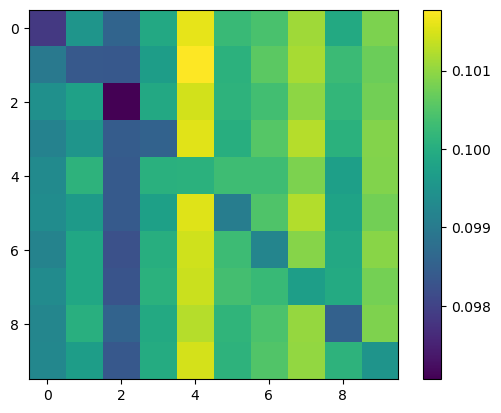

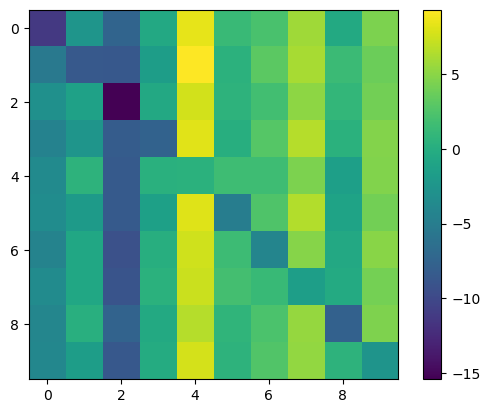

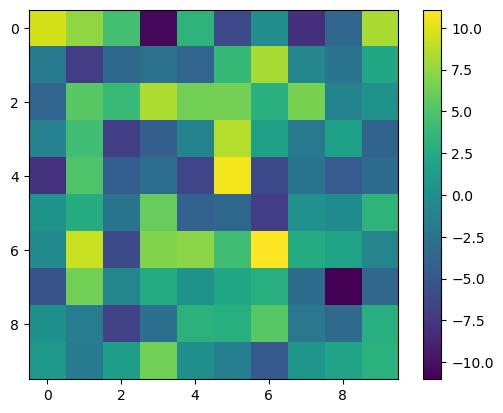

In [7]:
plt.imshow(avg_attention)
plt.colorbar()
plt.show()

# Normalize
mean = np.mean(avg_attention)
std = np.std(avg_attention)
normalized_avg_attention = (avg_attention - mean) / std

plt.imshow(normalized_avg_attention*weight_scale)
plt.colorbar()
plt.show()

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

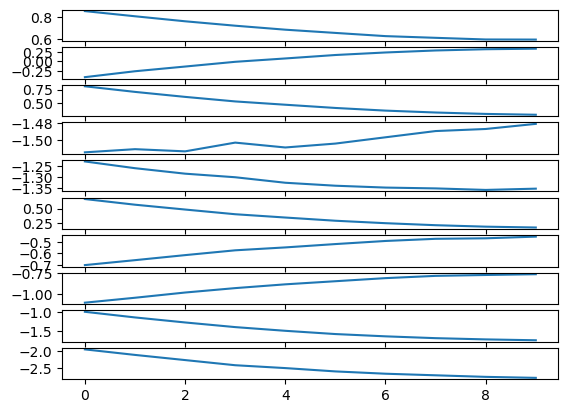

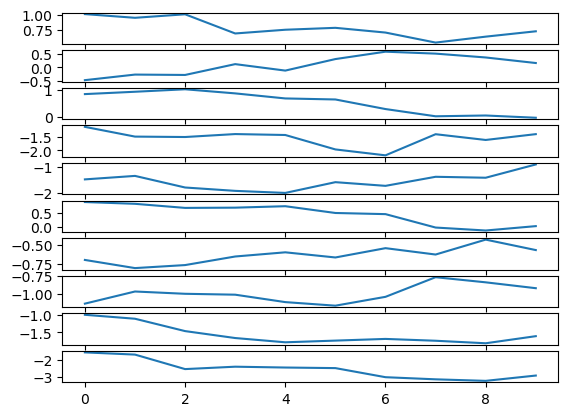

In [8]:
for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(predictions[1][i])
plt.show()

for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(ground_truths[1][i])
plt.show()